In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the Dataset

In [4]:
import os
uber_df = pd.read_csv(r'C:\Users\mothi\Downloads\Uber datasets\Uber-Jan-Feb-FOIL.csv')

In [5]:
uber_df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [9]:
uber_df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [7]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [11]:
uber_df['date'] = pd.to_datetime(uber_df['date'], format = '%m/%d/%Y')

In [12]:
uber_df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537
...,...,...,...,...
349,B02764,2015-02-28,3952,39812
350,B02617,2015-02-28,1372,14022
351,B02682,2015-02-28,1386,14472
352,B02512,2015-02-28,230,1803


## Which Base number has most Active vehicle

In [13]:
uber_df['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

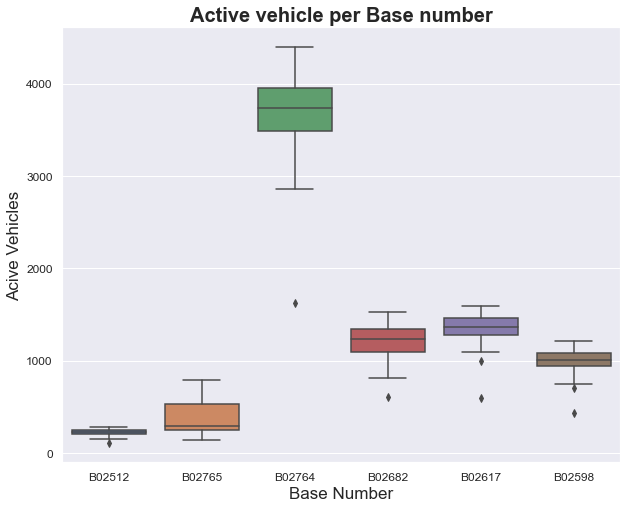

In [17]:
plt.figure(figsize = (10,8))

sns.boxplot(x = uber_df['dispatching_base_number'], y = uber_df['active_vehicles'])

plt.xlabel('Base Number', fontsize = 17)
plt.ylabel('Acive Vehicles', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Active vehicle per Base number', fontsize = 20, fontweight = 'bold')

plt.show()

## Which Base number has maximum trips

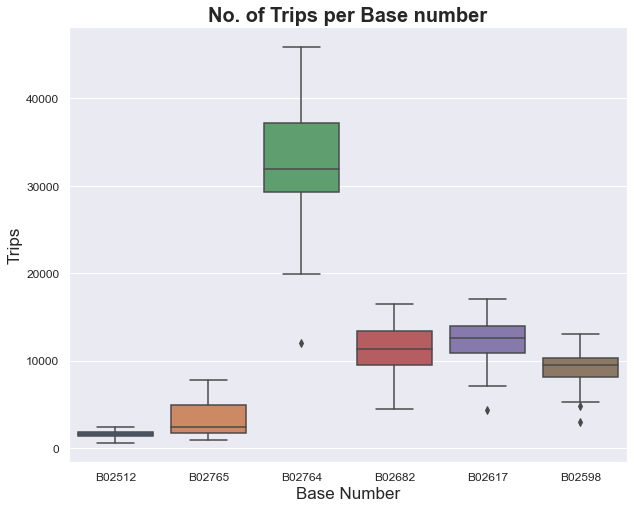

In [22]:
plt.figure(figsize = (10,8))

sns.boxplot(x = uber_df['dispatching_base_number'], y = uber_df['trips'])

plt.xlabel('Base Number', fontsize = 17)
plt.ylabel('Trips', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('No. of Trips per Base number', fontsize = 20, fontweight = 'bold')

plt.show()

## Creating Average Trips per Vehicle column

In [32]:
uber_df['Avg_Trips/Vehicle'] = uber_df['trips']/uber_df['active_vehicles']
uber_df.head()

,dispatching_base_number,date,active_vehicles,trips,Avg_Trips/Vehicle
0,B02512,2015-01-01,190,1132,5.957895
1,B02765,2015-01-01,225,1765,7.844444
2,B02764,2015-01-01,3427,29421,8.585060
3,B02682,2015-01-01,945,7679,8.125926
4,B02617,2015-01-01,1228,9537,7.766287


## Making Date column as Index

In [27]:
uber_df.set_index('date')

,dispatching_base_number,active_vehicles,trips,Avg_Trips/Vehicle Column
date,,,,
2015-01-01,B02512,190,1132,5.957895
2015-01-01,B02765,225,1765,7.844444
2015-01-01,B02764,3427,29421,8.585060
2015-01-01,B02682,945,7679,8.125926
2015-01-01,B02617,1228,9537,7.766287
...,...,...,...,...
2015-02-28,B02764,3952,39812,10.073887
2015-02-28,B02617,1372,14022,10.220117
2015-02-28,B02682,1386,14472,10.441558


## Analysis of Average Trips per vehicle with each Base number

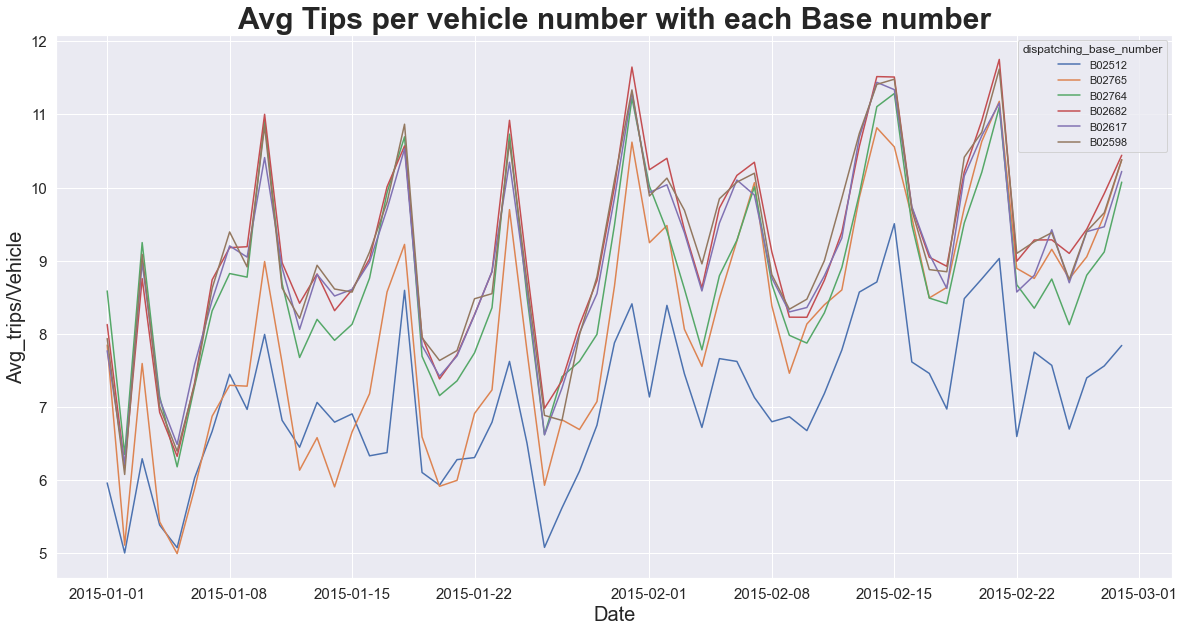

In [41]:
plt.figure(figsize = (20,10))

sns.lineplot(x = uber_df['date'], y = uber_df['Avg_Trips/Vehicle'], hue = uber_df['dispatching_base_number'])

plt.xlabel('Date', fontsize = 20)
plt.ylabel('Avg_trips/Vehicle', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Avg Tips per vehicle number with each Base number', fontsize = 30, fontweight = 'bold')


plt.show()